In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#a = normalization constant
a = 4/(1-np.exp(-4))
tcut = .67
getH0 = lambda t: a*np.exp(-4*t)
getH1 = lambda t: 2*np.sin(np.pi*t)**2

In [4]:
#Method to predict the next random number according to H0's pdf
#using transformation method
#Returns a single random number t generated according to 
#g(t|H0), 0<=t<=1; returns 0 otherwise
def nextvalueforH0():
    r = np.random.rand()
    t = -1/4*np.log(-r*4/a + 1)
    return t

In [5]:
#Method to predict the next random number according to H1's pdf
#using acception/rejection method
#returns a single random num t generated according to
#g(t|H1).
#NOTE: g(t|H1) = 2sin(pi*t) so max is at 2, so fbig = 2

#HOW DOES ACCEPT/REJECT WORK??
#want to get dist of random numbers t that fit the g(t|H1) pdf
def nextvalueforH1():
    test = False
    while(not test):
        t_test = np.random.rand()
        y = 2*np.random.rand()
        if(y < getH1(t_test)):
            #accept
            return t_test

In [9]:
#part (a):
c_type1_err = 0
H0_accept = []
for i in range(10000):
    t = nextvalueforH0()
    if(t > tcut):
        c_type1_err += 1
    else:
        H0_accept.append(t)
print(c_type1_err, " experiments result in rejecting H0 at the 95% confidence level when H0 is true.")
print("So there are ", c_type1_err, " type 1 errors.")

500  experiments result in rejecting H0 at the 95% confidence level when H0 is true.
So there are  500  type 1 errors.


In [10]:
#part (b)
c_type2_err = 0
H1_accept = []
for i in range(10000):
    t = nextvalueforH1()
    if(t < tcut):
        c_type2_err += 1
    else:
        H1_accept.append(t)
    
print(c_type2_err, " experiments result in accepting H0 at the 95% confidence level when H1 is true.")
print("So there are ", c_type2_err, " type 2 errors.")

8056  experiments result in accepting H0 at the 95% confidence level when H1 is true.
So there are  8056  type 2 errors.


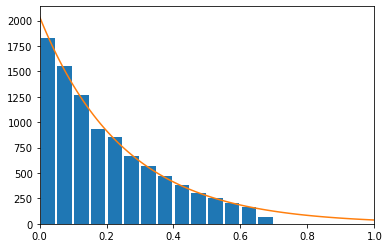

In [60]:
#histogram time
#Show a histogram for t for each of these samples (20 bins from 0-1) and overlay the curve that shows
#the expected number in each bin (in other words – the properly scaled pdf).

plt.hist(H0_accept, bins=np.arange(0,1,.05), rwidth=.86)
plt.xlim(0,1)

# overlay scaled PDF with finer bins to get a smooth curve
x_points = np.linspace(0,1,100)
y_points = 10000*.05*a*np.exp(-4*x_points)
plt.plot(x_points, y_points)
plt.show()

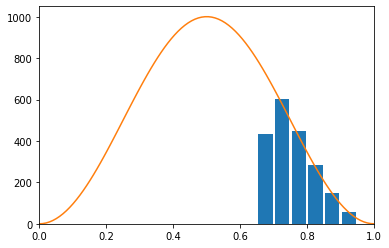

In [63]:
#(b) histogram time
#Show a histogram for t for each of these samples (20 bins from 0-1) and overlay the curve that shows
#the expected number in each bin (in other words – the properly scaled pdf).

plt.hist(H1_accept, bins=np.arange(0,1,.05), rwidth=.86)
plt.xlim(0,1)

# overlay scaled PDF with finer bins to get a smooth curve
x1_points = np.linspace(0,1,100)
y1_points = 10000*.05*getH1(x_points)
plt.plot(x1_points, y1_points)
plt.show()

The above histograms are as expected, as the type 2 errors are the rejected values of H0 when H1 is true.
So they are opposite slices of the pdf, where the slice is tcut.